In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import Constants as C
from PlotTool import PlotTool
from Loader import Loader
from Cuts import qlayerCut, qratio, maxDistMaxDoms
from Cuts import balloonChargeRatio, balloonCut

import matplotlib.pyplot as plt

#savedir = '../plots/cutsana/'
#savedir = '../plots/mvaana/'
#savedir = '../plots/mvaana_recleanedpulses_latestdir/'
#savedir = '../plots/mvaana_vhecorsika/'
#savedir = '../plots/mvaana_ballooncuts/'
savedir = '../plots/mvaana_ballooncuts_srtdustlayeroff/'

In [2]:
# Load the data here
loader = Loader(C.basesel+'&&(ImpLF_rchi2 > 80)')

dt_data = loader.getData()
dt_cor  = loader.getCorsika()
dt_nue  = loader.getNuE()
dt_numu = loader.getNuMu()

In [3]:
# insert the qratio into the frame
def addqratio(data):
    data['qratio'] = pd.Series( qratio(data), index=data.index)
    return data

dt_data = addqratio(dt_data)
dt_cor  = addqratio(dt_cor)
dt_nue  = addqratio(dt_nue)
dt_numu = addqratio(dt_numu)

In [4]:
# Add the maximum distance to the data frame as well

dt_data['maxDist'] = maxDistMaxDoms(dt_data)
dt_nue['maxDist']  = maxDistMaxDoms(dt_nue)
dt_numu['maxDist'] = maxDistMaxDoms(dt_numu)
dt_cor['maxDist']  = maxDistMaxDoms(dt_cor)

In [5]:
# Add the balloon charge ratio 

dt_data['bQRat'] = balloonChargeRatio(dt_data)
dt_nue['bQRat'] = balloonChargeRatio(dt_nue)
dt_numu['bQRat'] = balloonChargeRatio(dt_numu)
dt_cor['bQRat'] = balloonChargeRatio(dt_cor)

In [6]:
# Now that the data is loaded, put everything into an info object
dt_mc = pd.concat([dt_cor, dt_nue, dt_numu])

def getinfo(data, mctot, cor, nue, numu):

    return {'data' : [data, mctot, cor, nue, numu, nue, numu],
            'names'    : ['Data',
                          'Total Bkg.', 
                          r'Atmos. $\mu$',
                          r'Atmos. $\nu_{e}$', 
                          r'Atmos. $\nu_{\mu}$',
                          r'Astro. $\nu_{e}$',
                          r'Astro. $\nu_{\mu}$'],
            'weights' : ['w','w','w','w','w', 'wE2', 'wE2'], 
            'colors'  : ['black', 'r', 'm', 'g', 'b', 'y','c'],
            'lw'      : [0, 1.5, 1.5, 1.5, 1.5,1.5,1.5],
            'ls'      : ['solid','dashed','solid','solid','solid','solid','solid'],
            'marker'  : ['.',' ', ' ', ' ', ' ',' ',' ']
    }
    
info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)

In [8]:
# Initialize the plot tool
p_tool = PlotTool()

# Now drop in some stacked plots that we want to understand
variables = {'hs_z_travel' : [50,-500,500, 'ztravel','z-travel [m]'],
             'rho_travel'  : [50, 0, 1000, 'rhotravel', r'$\rho$-travel [m]'],
             'log10(hs_q_tot_pulses)' : [40, 3, 7, 'logqtot','log10(NPE)'],
             'log10(NPE)'     : [40, 3, 7, 'lognpe','log10(NPE) (portia)'],
             #'cos(ImpLF_zen)' : [30, -1, 1, 'coszen', r'cos($\theta$)'],
             'qratio'         : [100,0,1,'qratio','qratio'],
             'hm_nhit_doms'   : [50,0,1500, 'hitdoms', r'N Hit Doms'],
             'hm_nhit_strings': [40,0,80,'hitstrings','N Hit Strings'],
             'Nch'            : [20,0,1500, 'Nch', 'N Channel (portia)'],
             #'firsthitout'    : [2,-0.5,1.5, 'firsthitout', 'First Hit Outer'],
             'tlarge5[0]-tearly5[0]'  : [100, 0, 10000, 'tEarlyMinusLarge', 'tlarge-tearly'],
             #'risetimelarge5cumu[0]'  : [40, 0, 400, 'risetime0Cumu','Risetime0 (Cumulative) [ns]'],
             #'risetimelarge5[0]'  : [40, 0, 400, 'risetime0','Risetime0 [ns]'],
             #'risetimelarge5cumu[1]'  : [40, 0, 400, 'risetime1Cumu','Risetime1 (Cumulative) [ns]'],
             #'risetimelarge5[1]'  : [40, 0, 400, 'risetime1','Risetime1 [ns]'],
             #'widthlarge5[0]' : [40,0,400,'width0','Width0 [ns]'],
             #'widthlarge5[1]' : [40,0,400,'width1','Width1 [ns]'],
             'cumuAt600ns' : [25,0,1,'cumuAt600ns','Cumulative @ 600ns'],
             'widthAt50' : [,0,2000,'widthAt50','Width @ 50% [ns]'],
             #'widthAt70' : [50,0,2000,'widthAt70','Width @ 70% [ns]'],
             'maxDist' : [25,0,1000,'maxDist','Max Dist 3 Largest Charge DOms'],
             'ImpLF_rchi2' : [50,0,500,'rchi2',r'Reduced $\chi^{2}$'],
             #'q_largest-q_onstring' : [100,-5000,2000,'qDiff','q_largest - q_onstring'],
             'hs_cogz' : [50,-500,500,'cog_z','COG z [m]'],
             'sqrt(hs_cogx*hs_cogx+hs_cogy*hs_cogy)' : [30,0,600,'cog_rho',r'COG $\rho$'],
             #'bQRat' : [100,1,100,'balloonQRatio',r'NPE$^{tot}$ / NPE$^{MaxDom}$'],
             'bQRat' : [50,1,25,'balloonQRatio_zoom',r'NPE$^{tot}$ / NPE$^{MaxDom}$ (zoomed)'],
             'rho_travel5' : [50,0,1000,'rhotravel5pe',r'$\rho$-travel (> 5 p.e.) [m]'],
             'ndoms_5pe' : [50,0,1500,'hitdoms5pe','N Hit Doms (> 5 p.e.)'],
             'nstrings_5pe' : [40,0,80,'hitstrings5pe','N Hit Strings (> 5 p.e.)']
            }



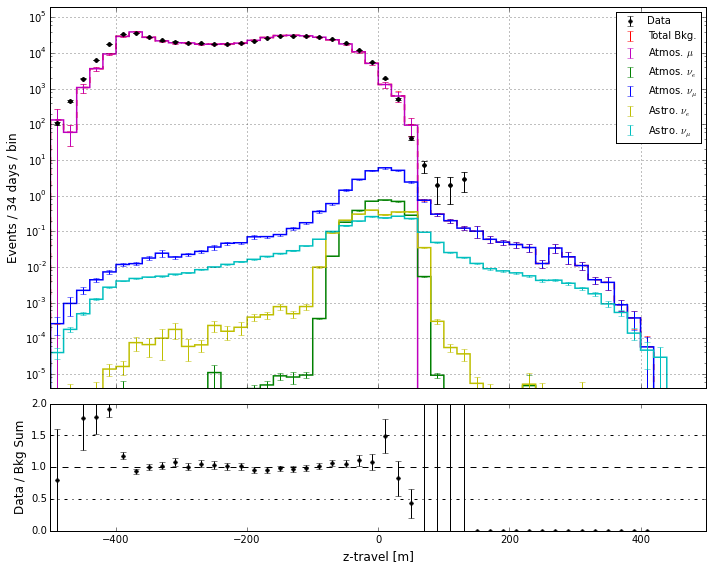

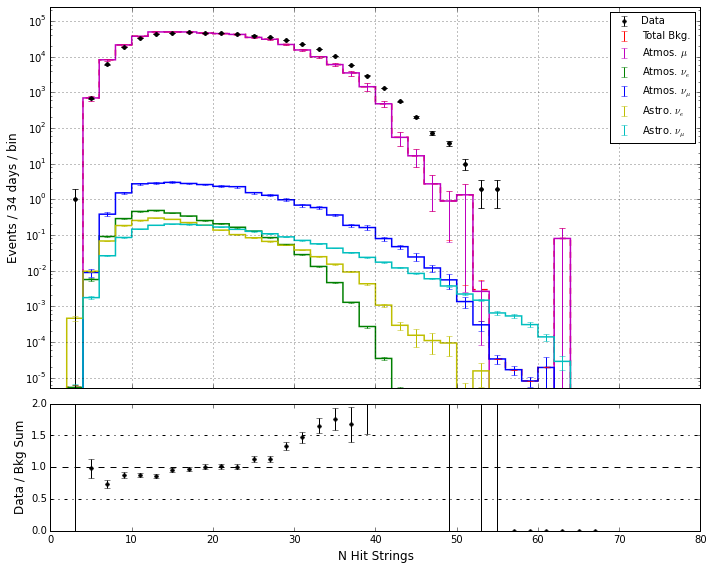

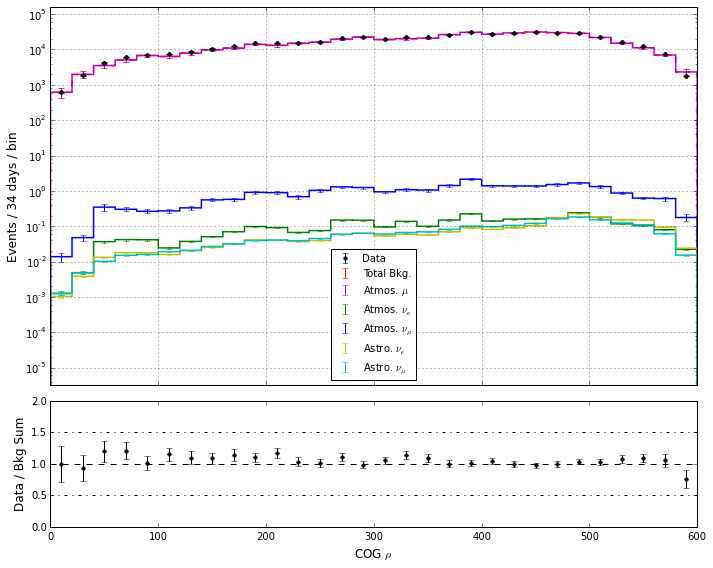

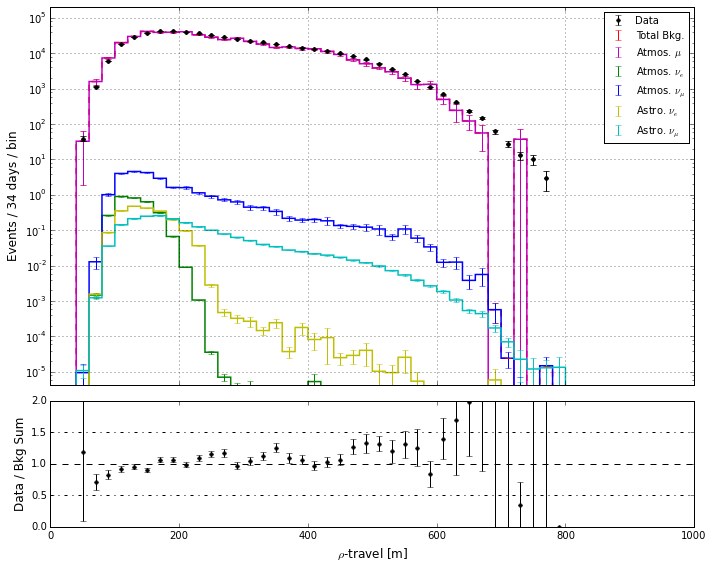

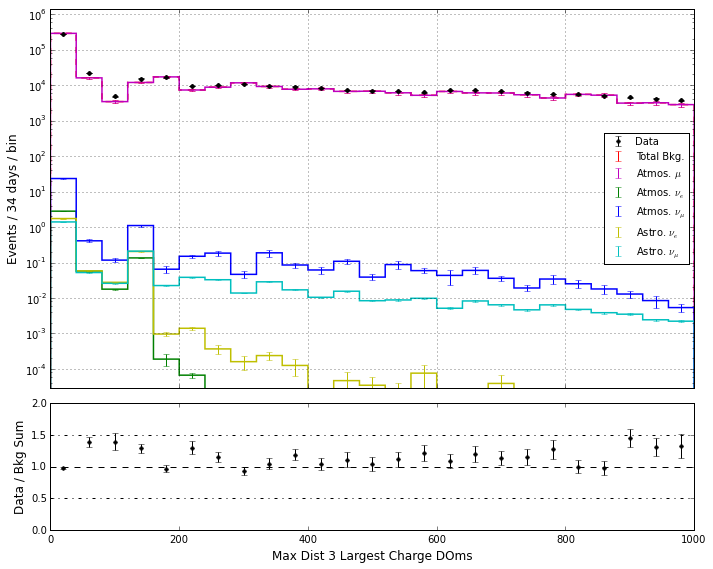

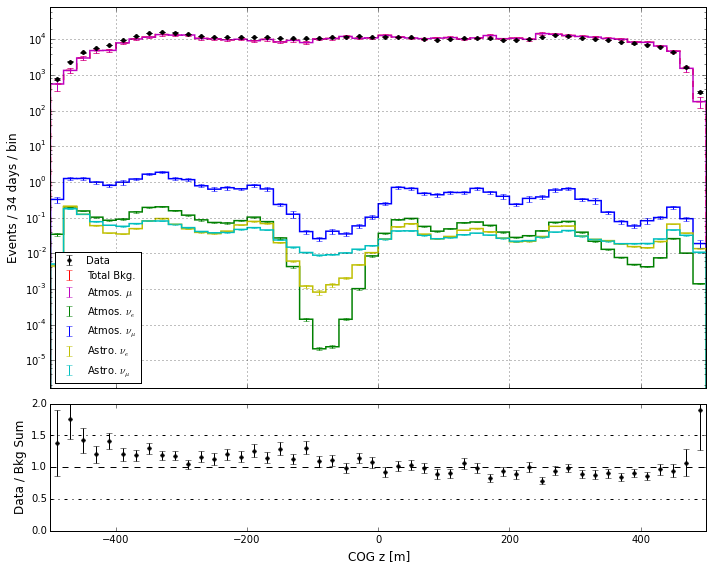

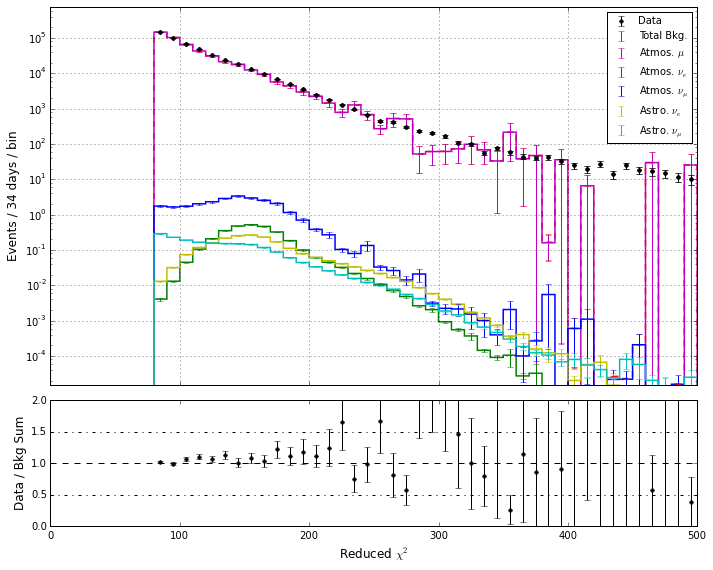

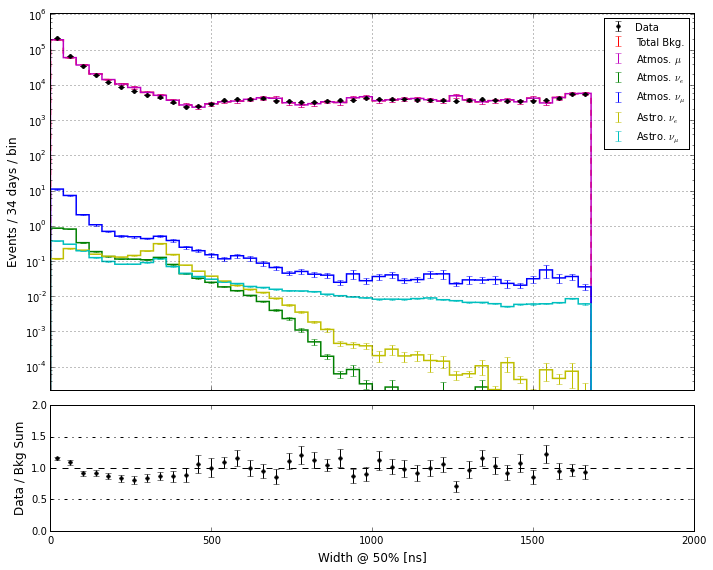

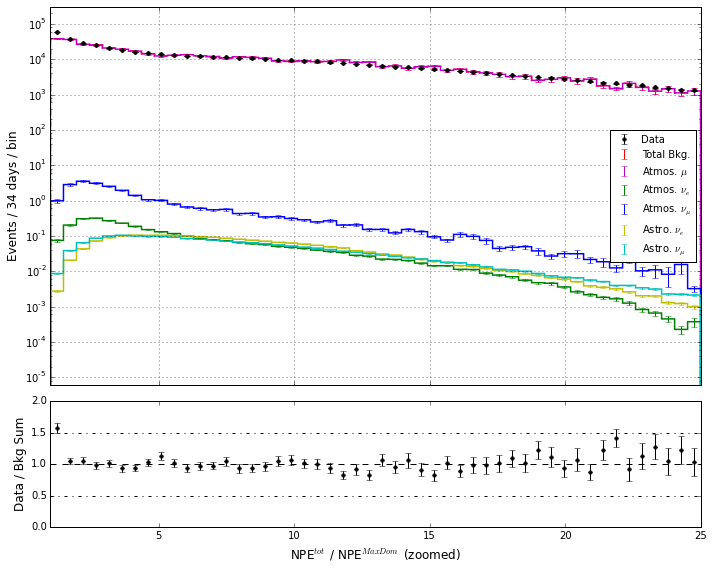

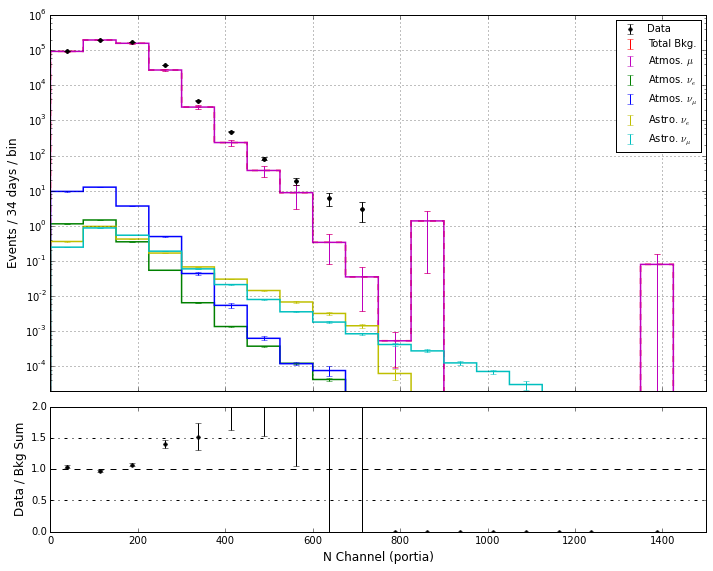

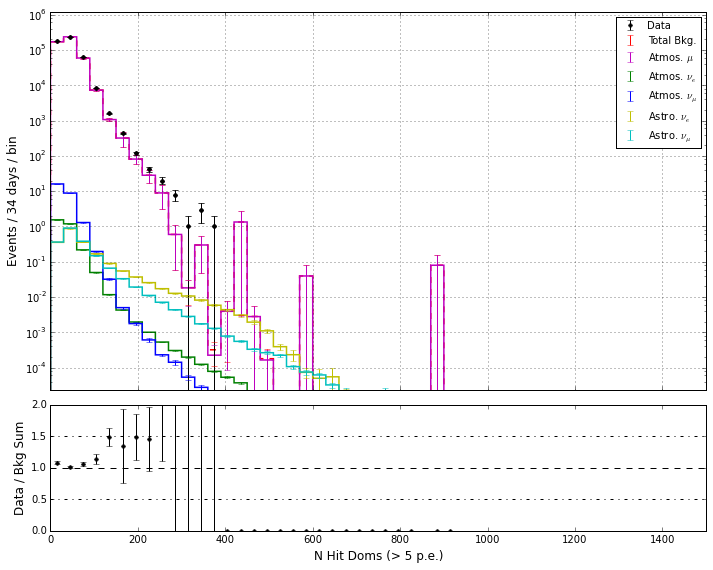

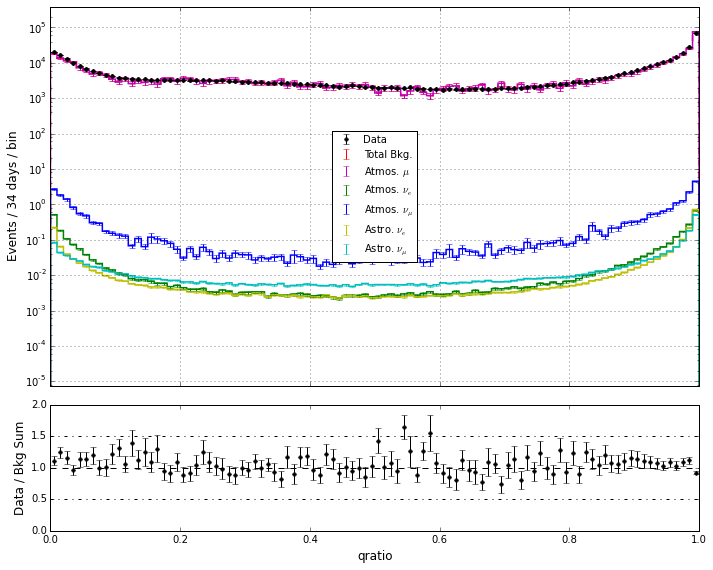

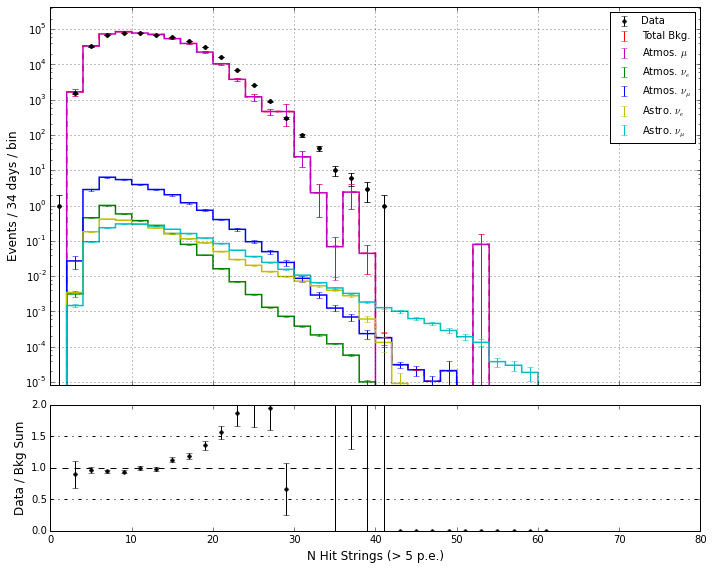

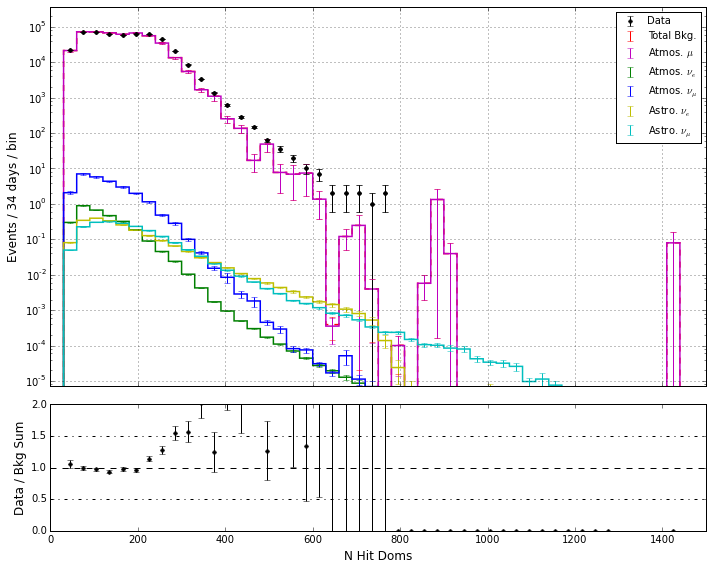

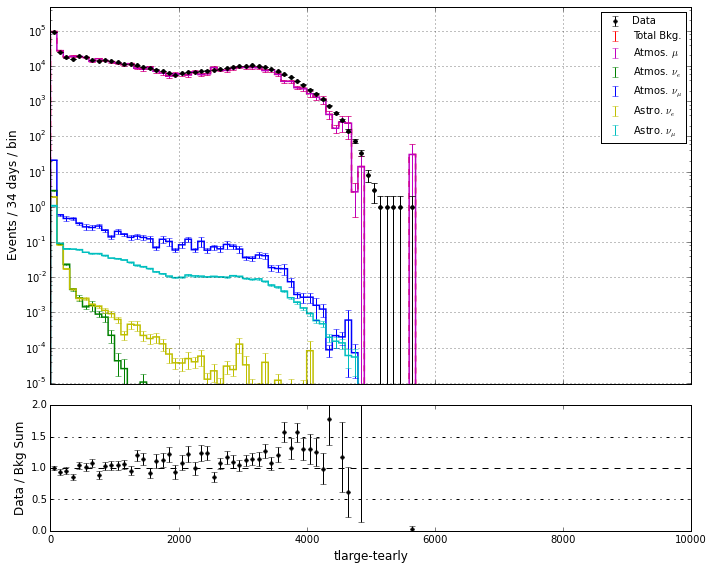

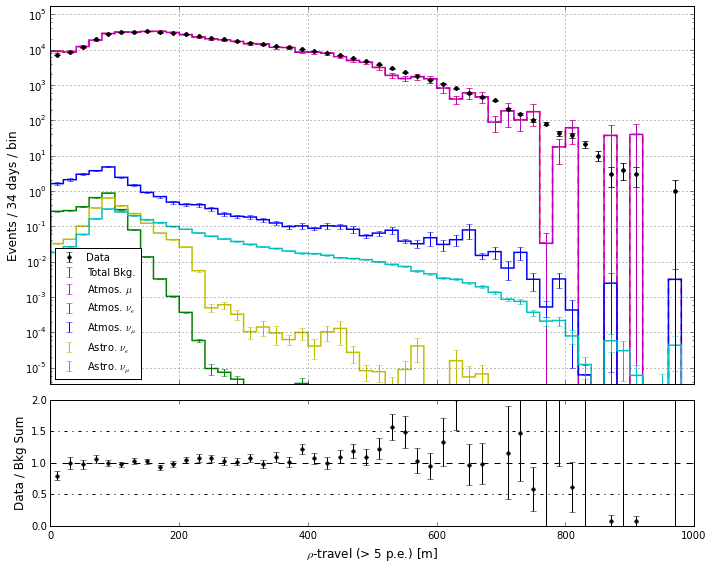

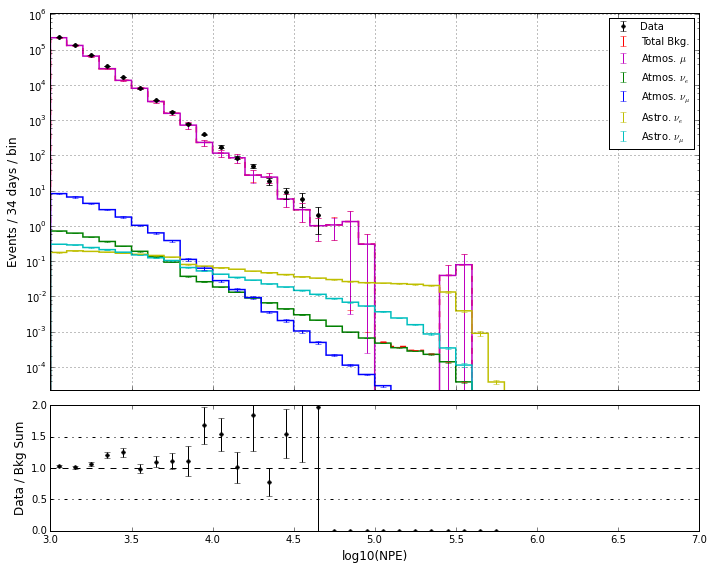

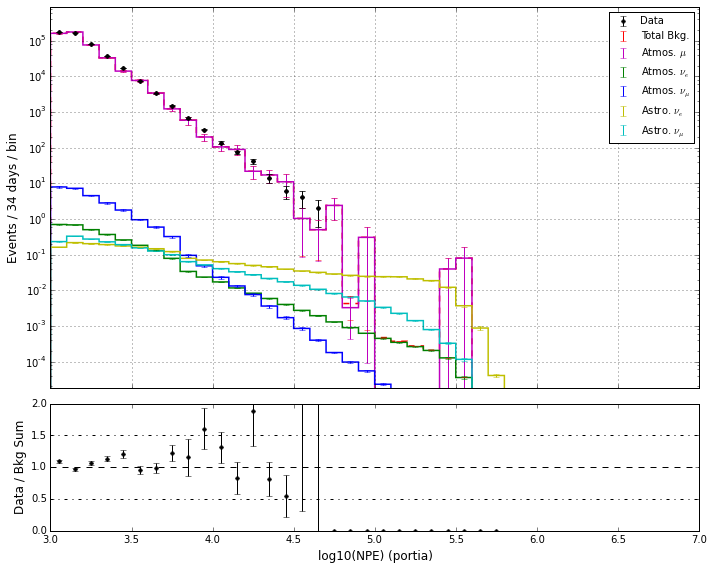

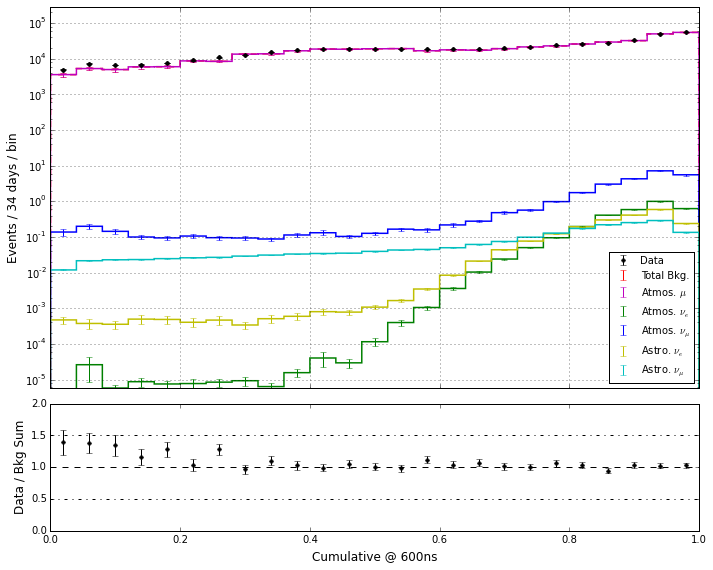

In [9]:
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    
    #plt.savefig(savedir+'baseline/'+lims[3]+'.png')

In [12]:
# Place the balloon event cut
def bcut(d,cval):
    return d[ d['bQRat'] > cval]

bcutval = 2
dt_data = bcut(dt_data,bcutval)
dt_numu = bcut(dt_numu,bcutval)
dt_nue = bcut(dt_nue,bcutval)
dt_cor = bcut(dt_cor,bcutval)
dt_mc = bcut(dt_mc,bcutval)

info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)


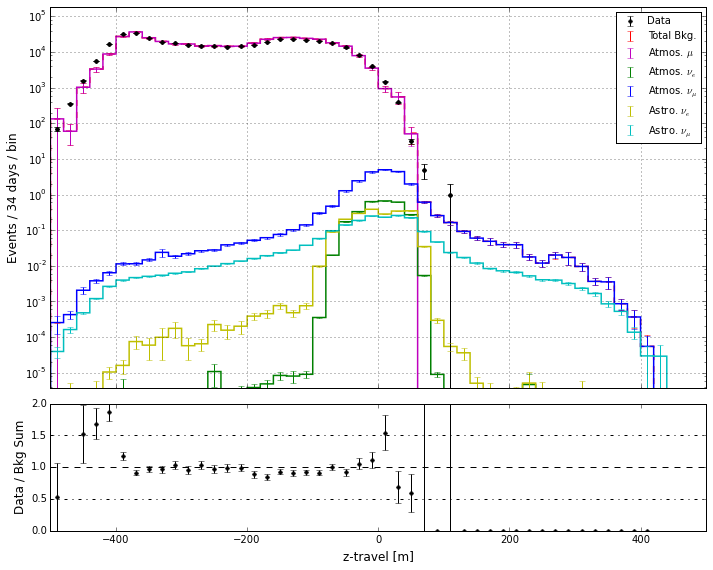

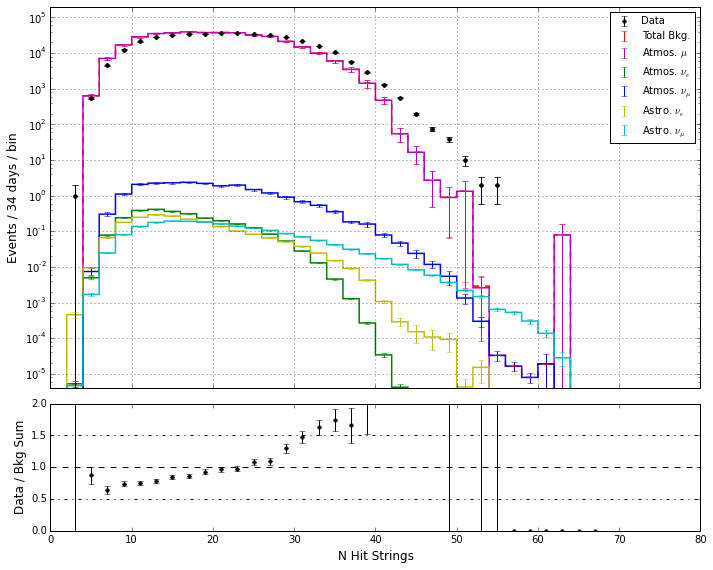

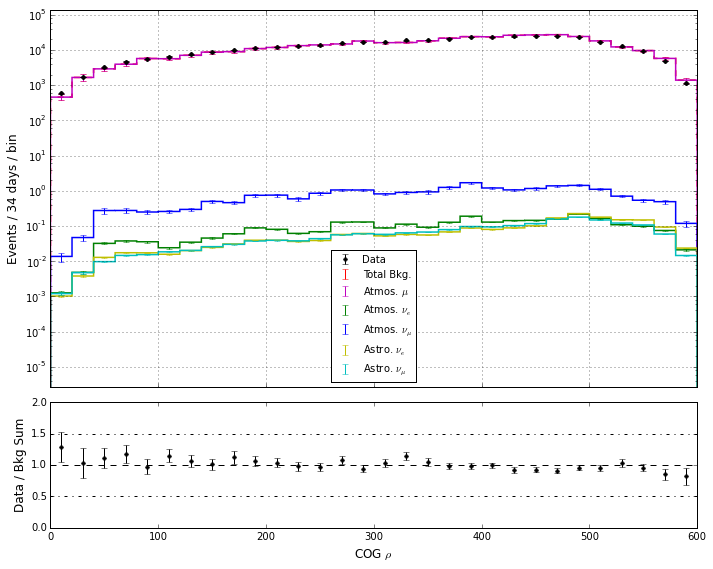

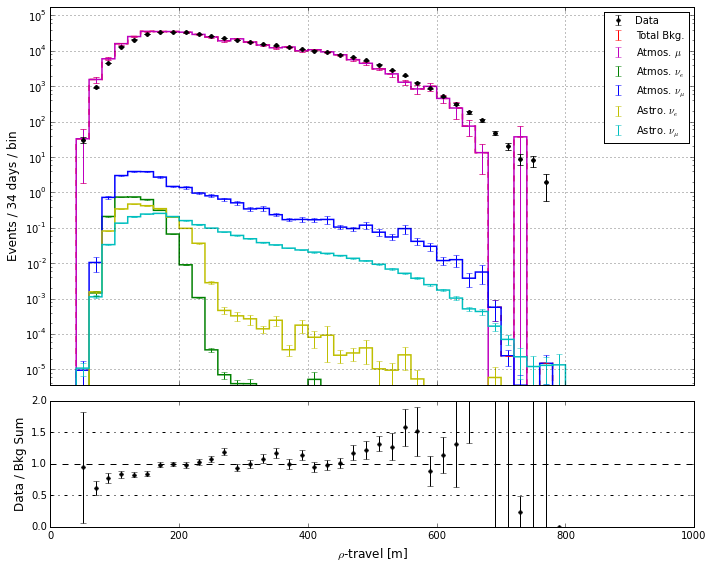

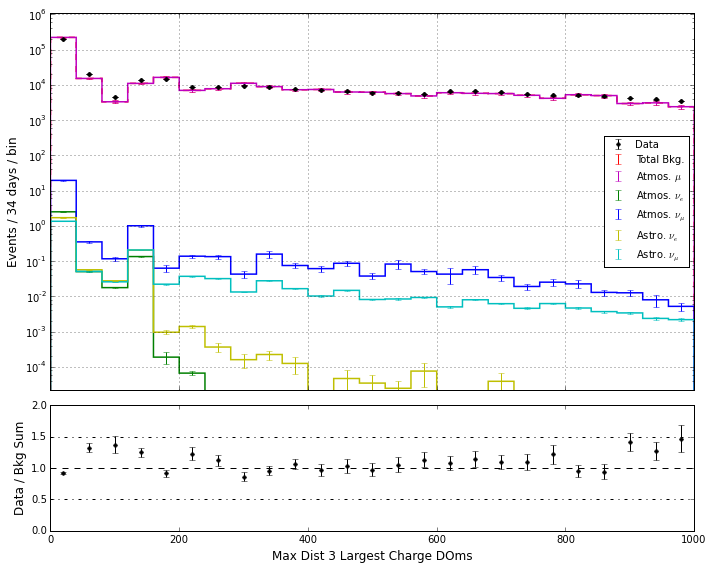

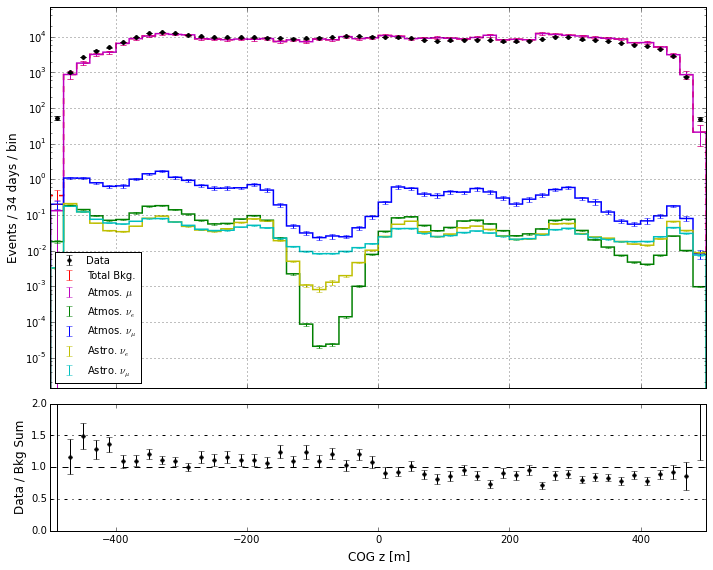

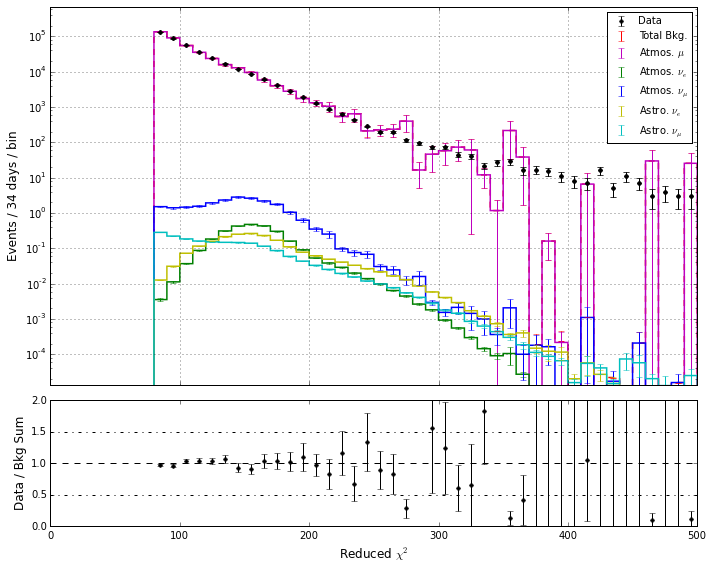

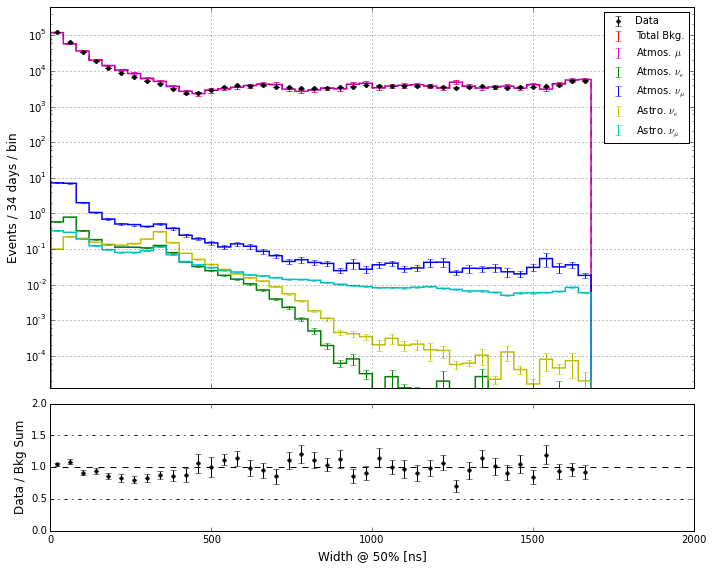

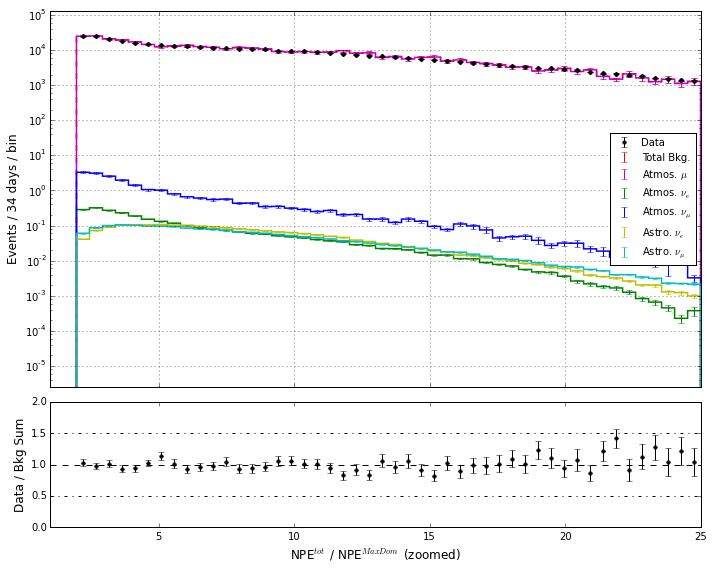

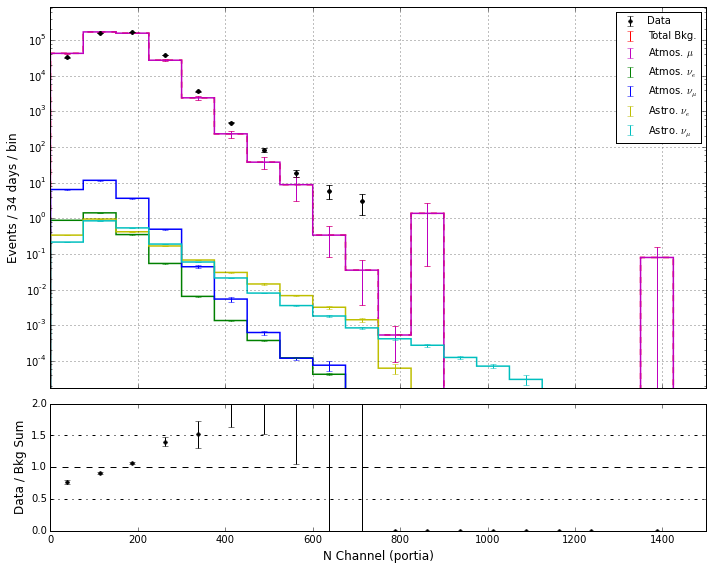

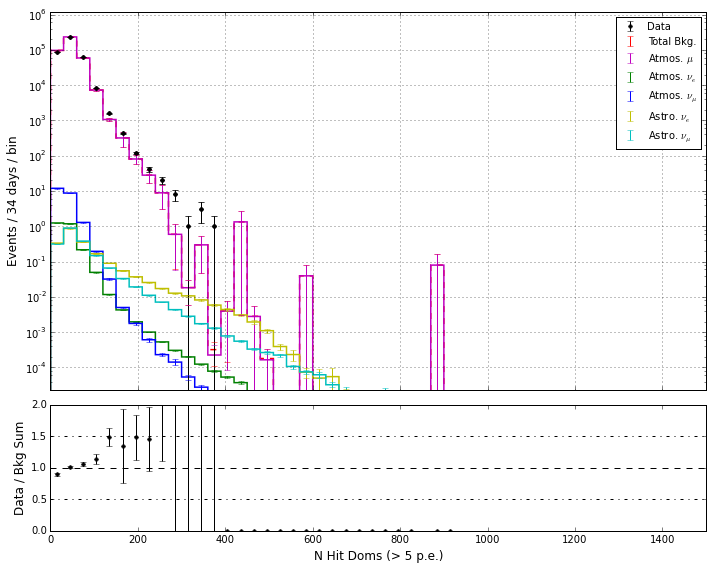

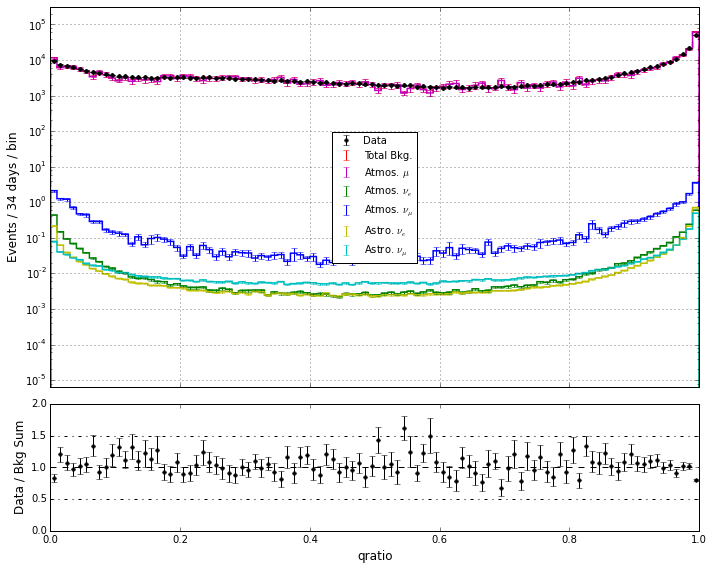

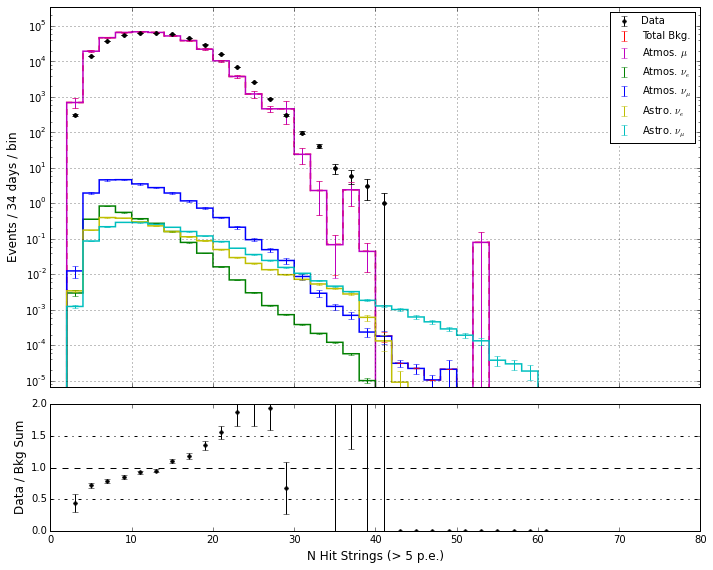

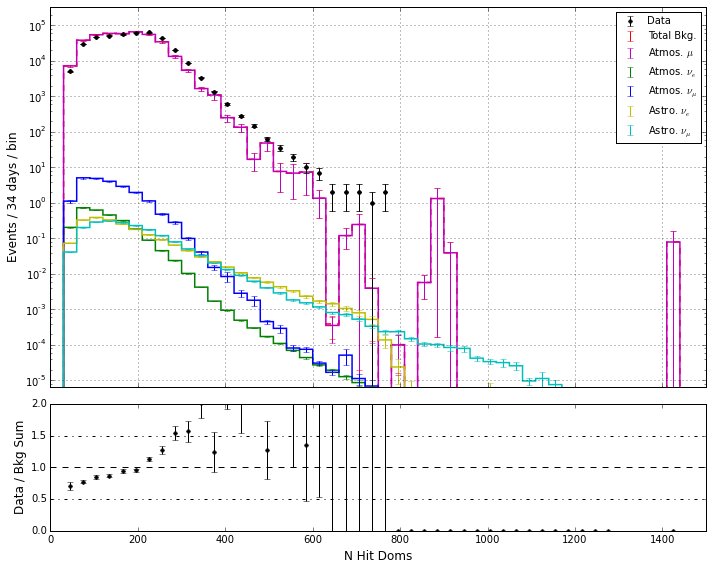

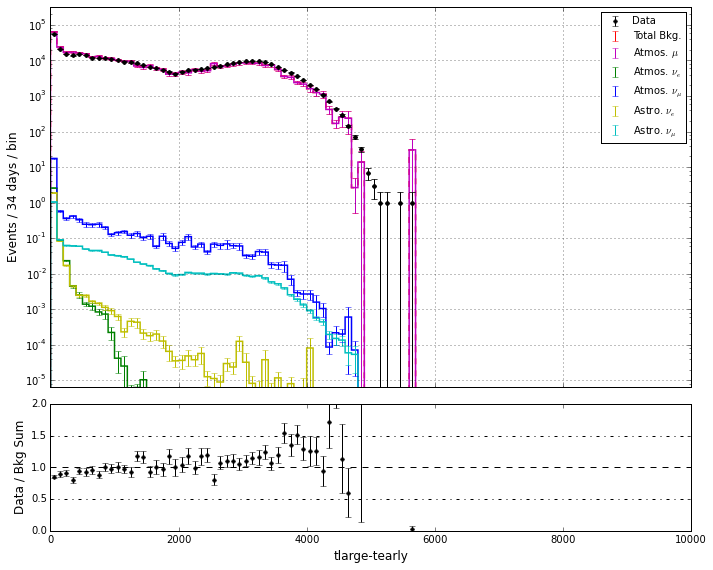

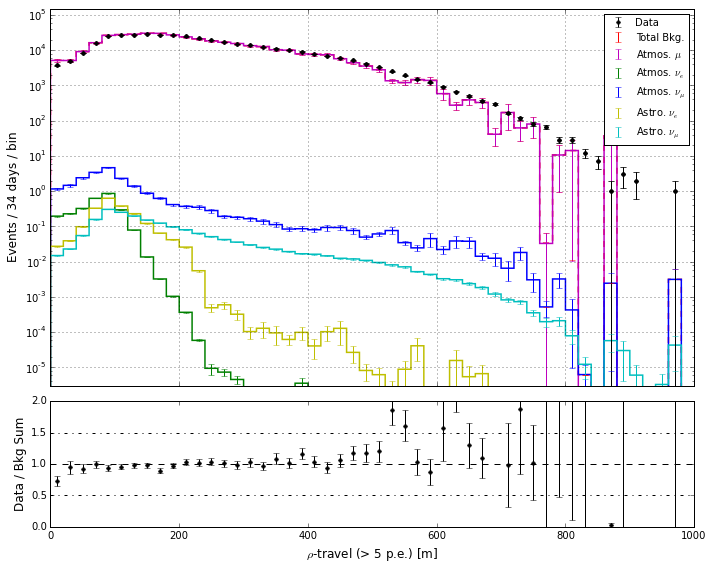

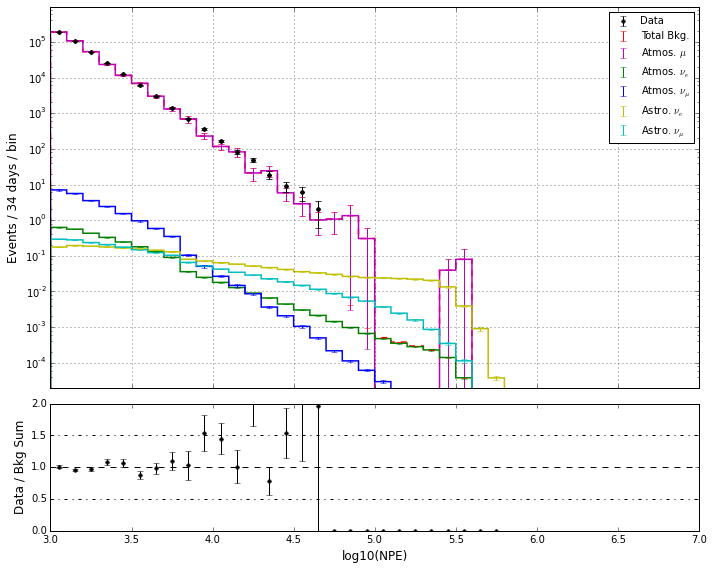

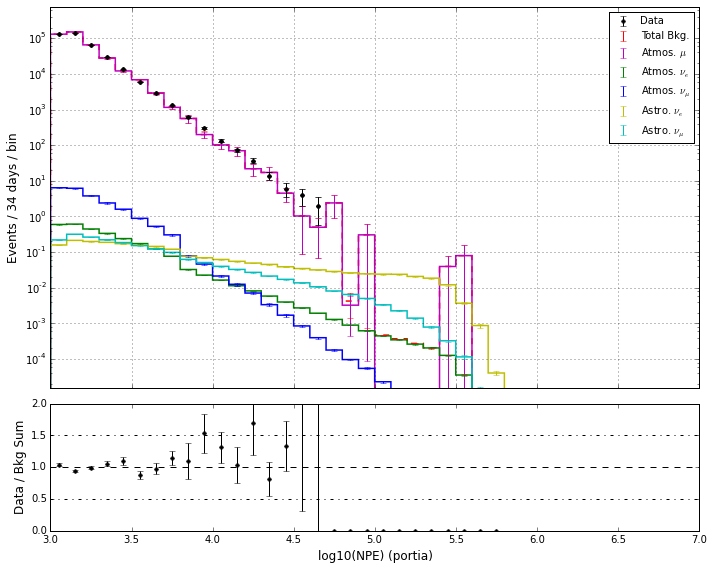

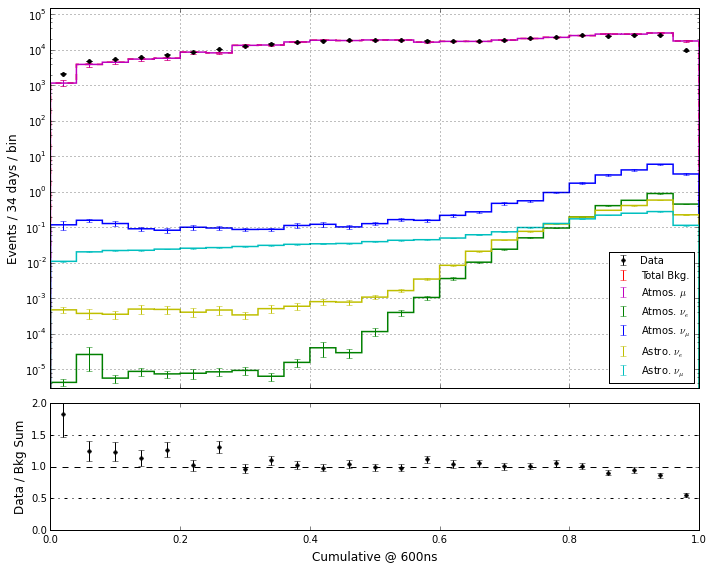

In [13]:
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    
    #plt.savefig(savedir+'ballooncut/'+lims[3]+'.png')

In [14]:
# Ok, now let's focus on the outer events.

# Apply qlayerCut
cval = 0.8
dt_data = qlayerCut(dt_data, False, cval)
dt_numu = qlayerCut(dt_numu, False, cval)
dt_nue  = qlayerCut(dt_nue, False, cval)
dt_cor  = qlayerCut(dt_cor, False, cval)
dt_mc   = qlayerCut(dt_mc, False, cval)

info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)


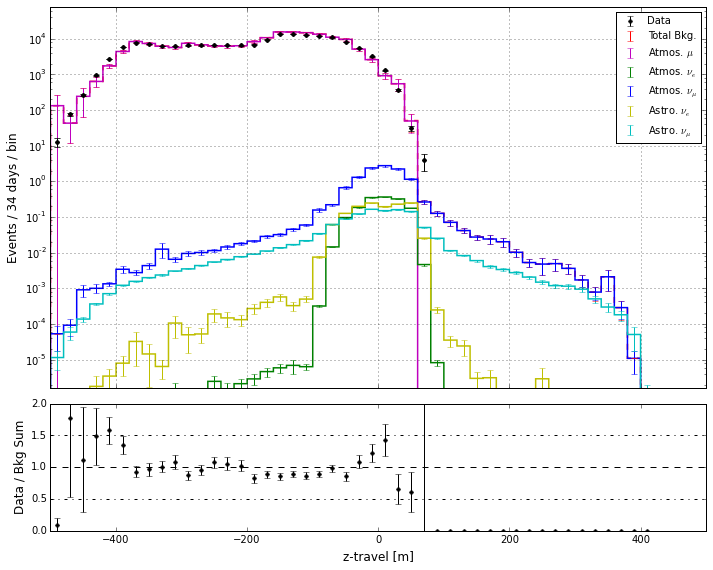

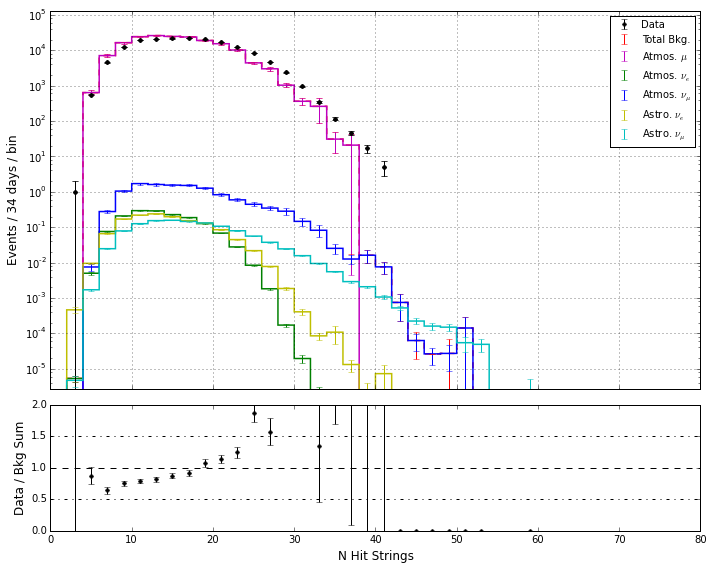

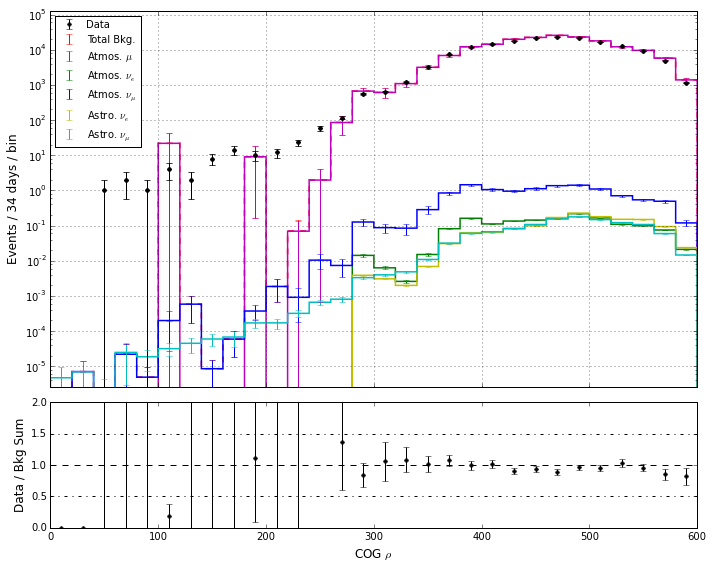

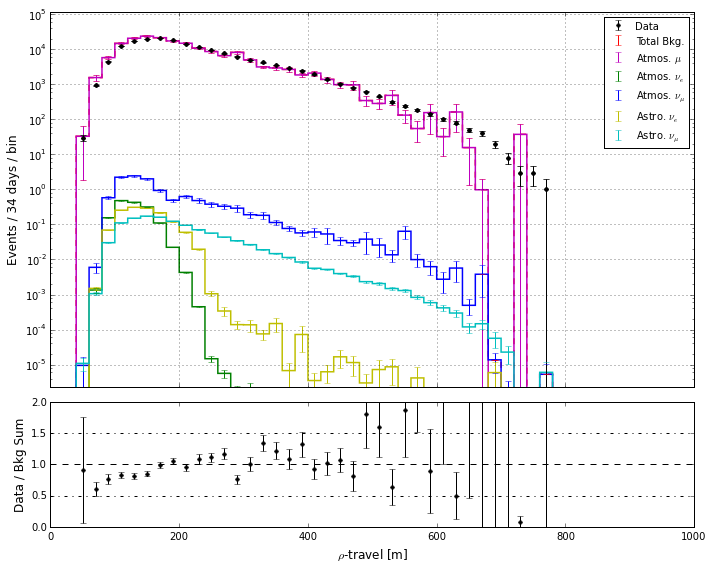

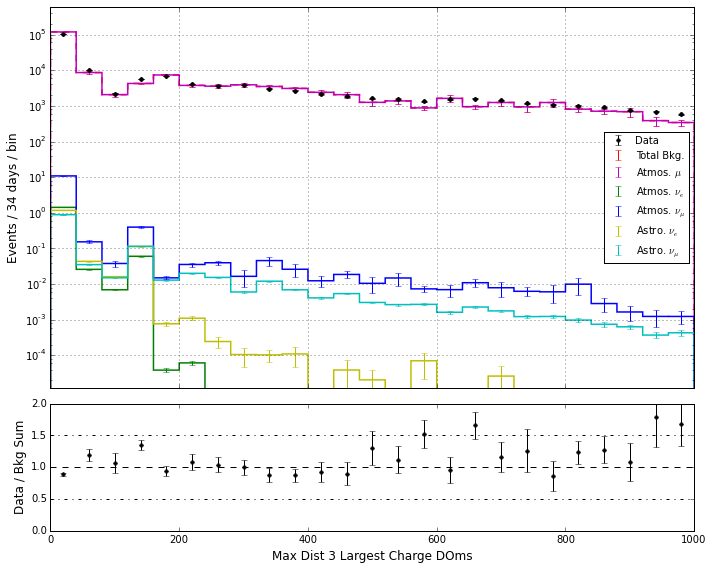

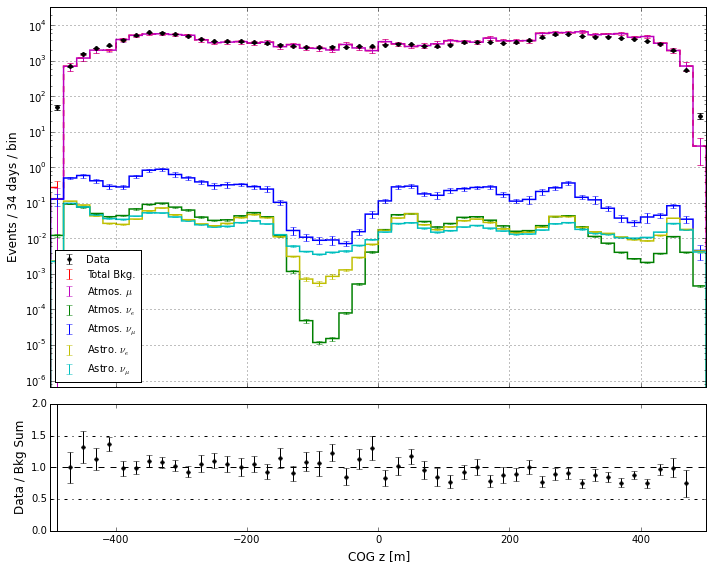

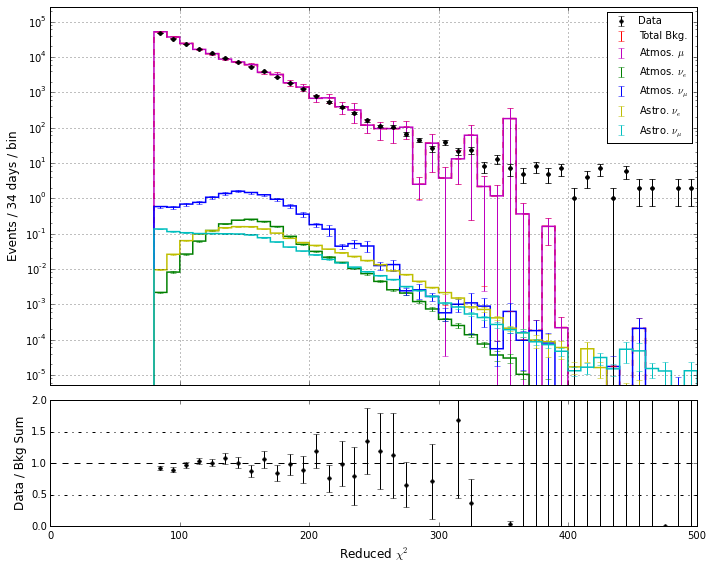

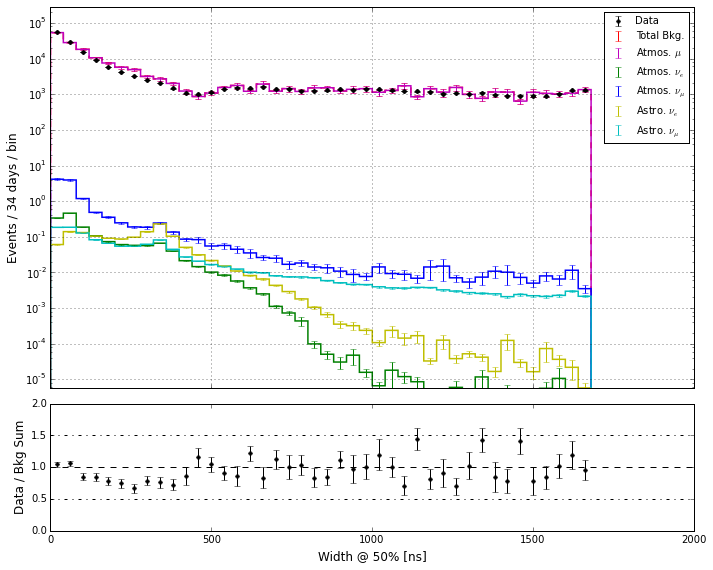

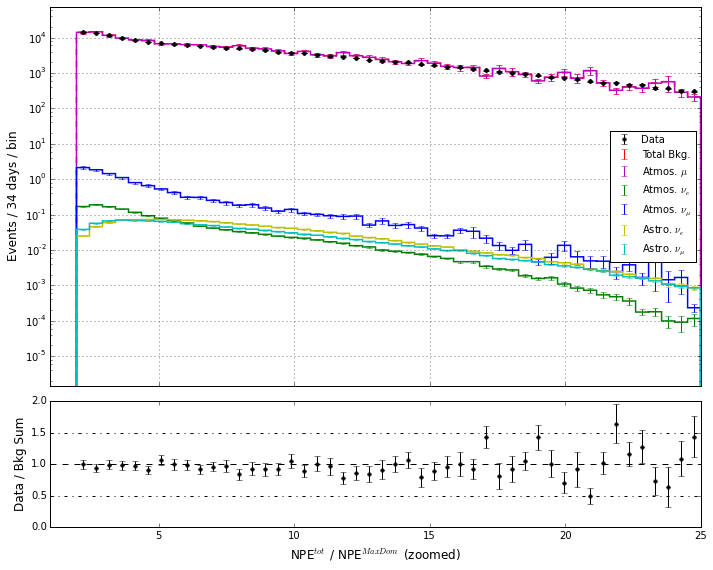

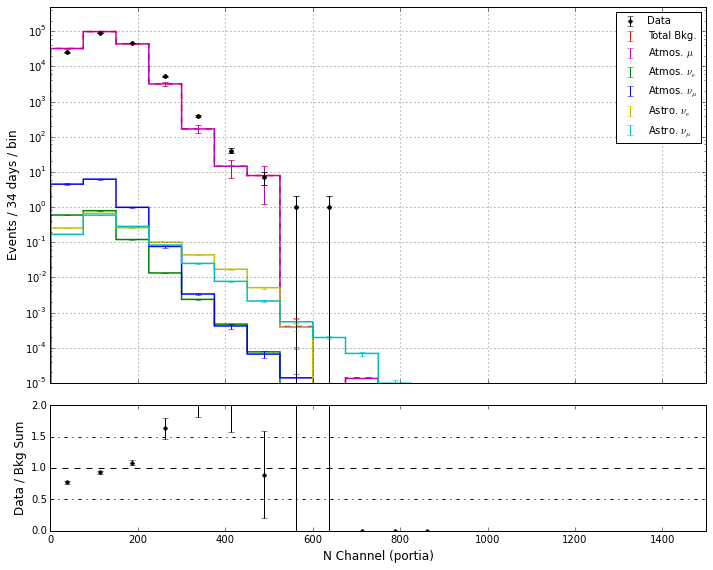

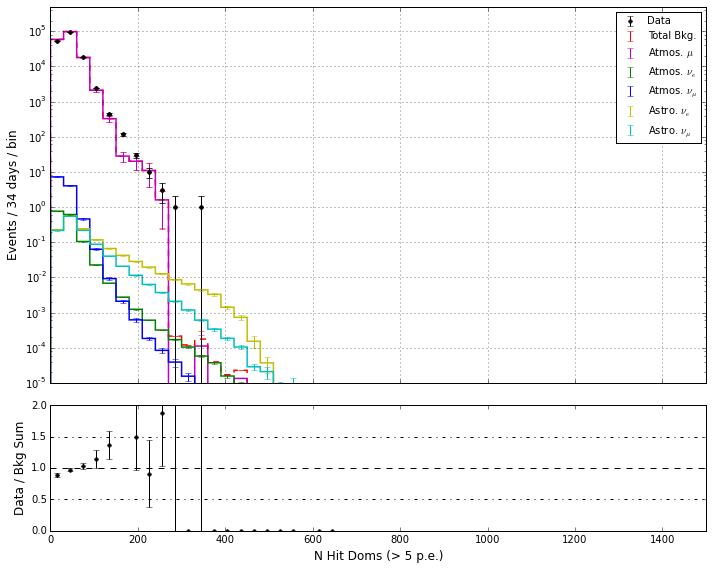

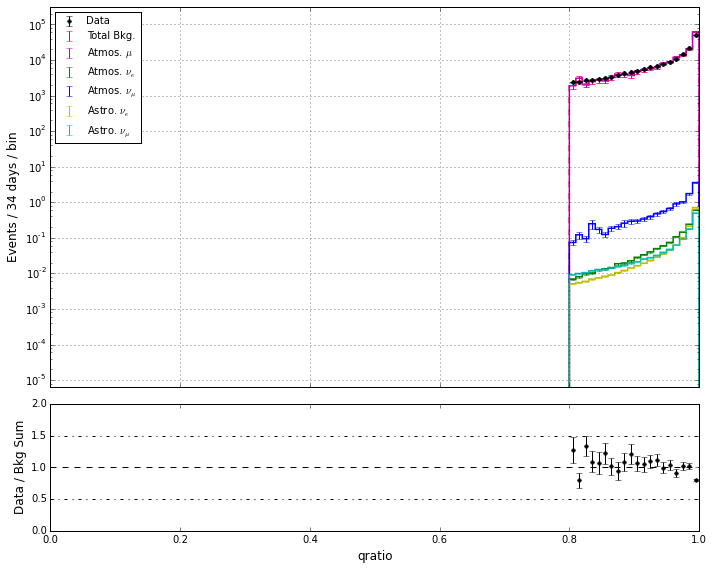

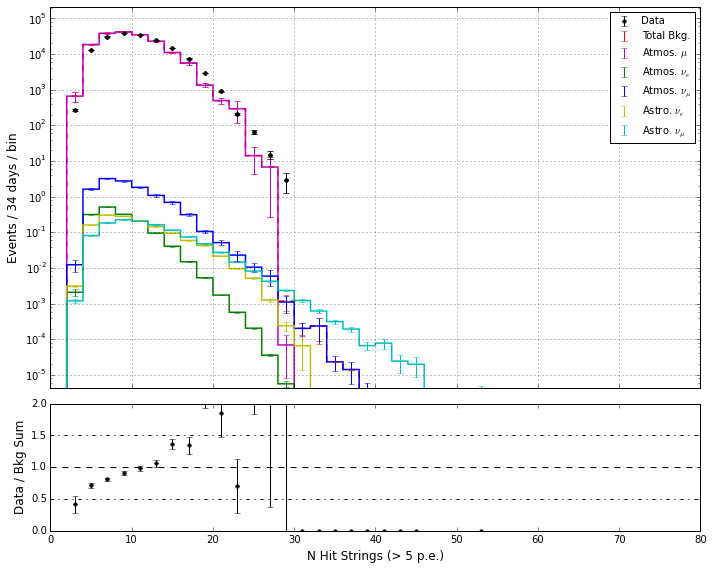

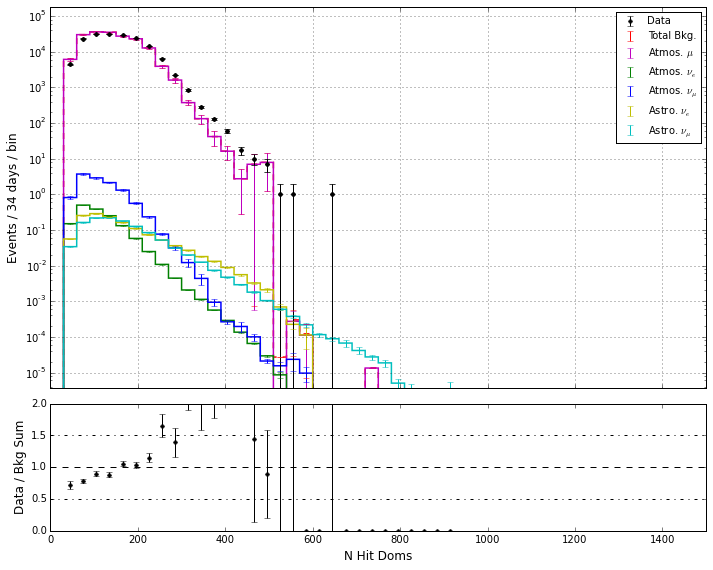

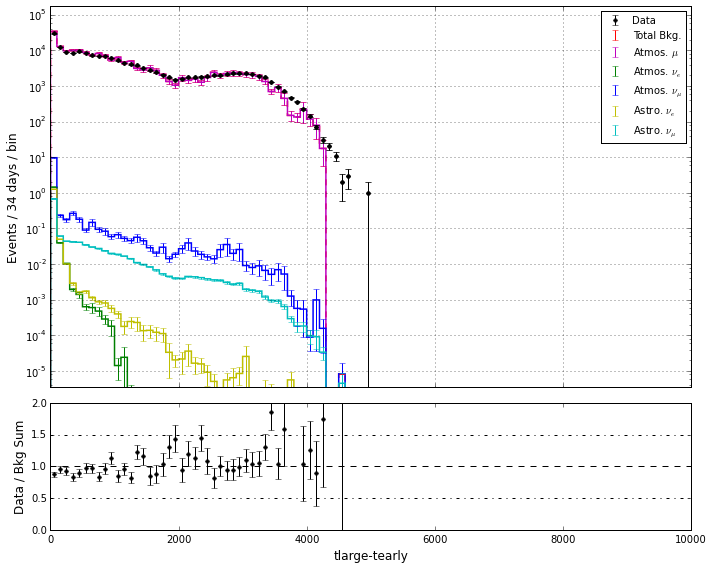

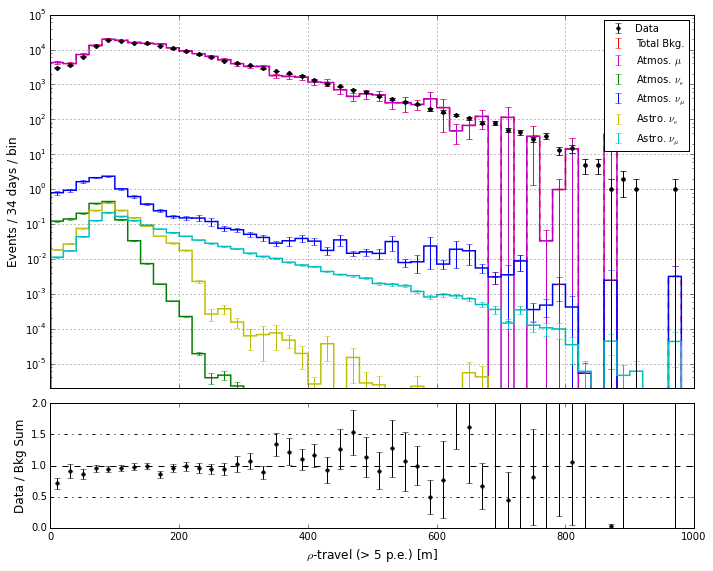

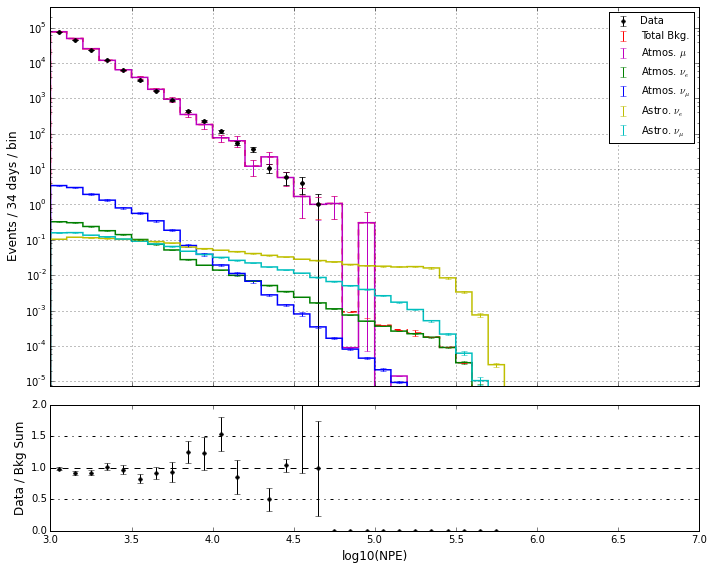

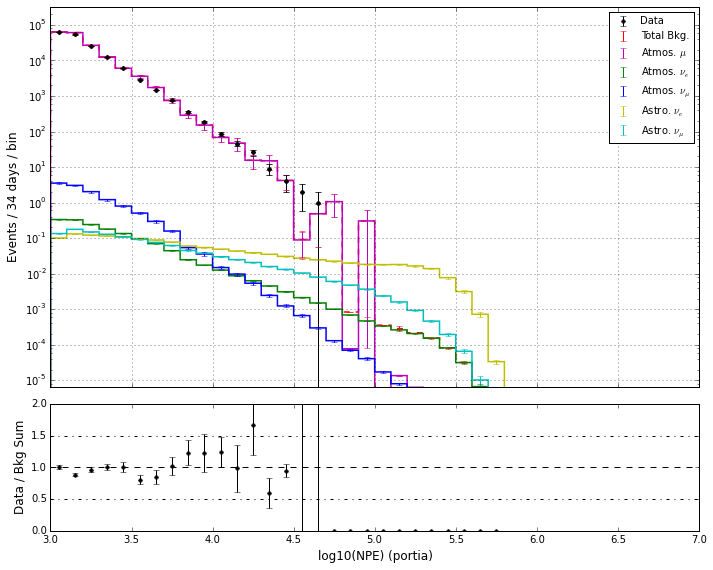

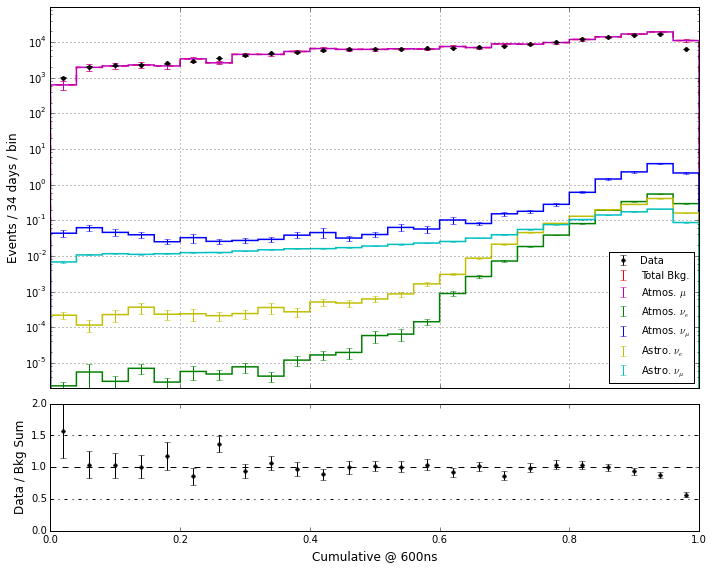

In [15]:
# Check variables again after the cut
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)

    #plt.savefig(savedir+'ballooncut_qratiocut/'+lims[3]+'.png')

In [18]:
# Let's cut on tlarge-tearly
def dtcut(dt, cval):
    return dt[ dt['tlarge5[0]-tearly5[0]'] < cval]

# Cut away at 200
cut = 200
dt_data = dtcut(dt_data, cut)
dt_numu = dtcut(dt_numu, cut)
dt_nue  = dtcut(dt_nue, cut)
dt_cor  = dtcut(dt_cor, cut)
dt_mc   = dtcut(dt_mc, cut)

info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)

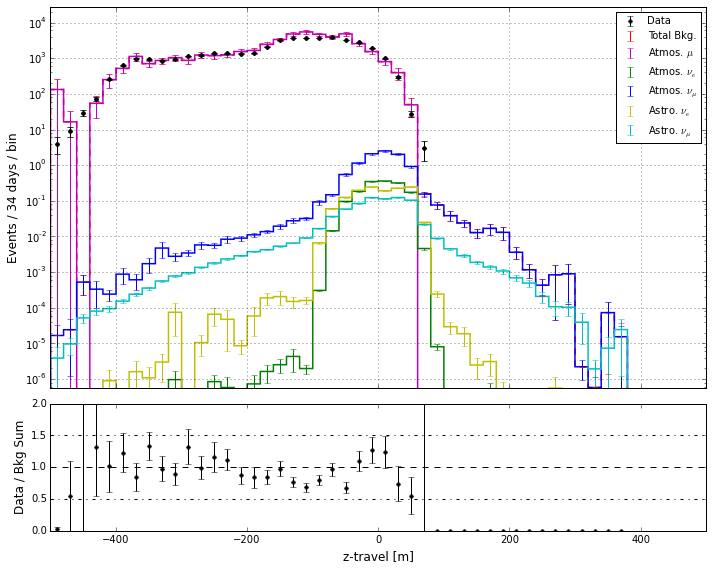

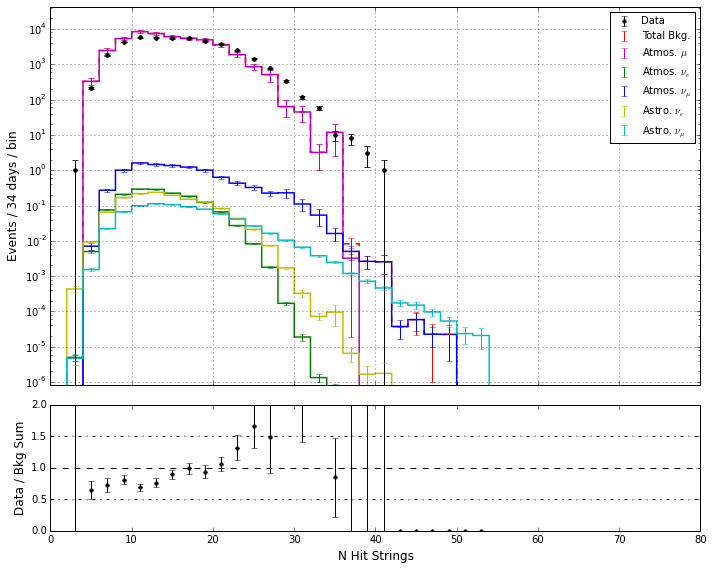

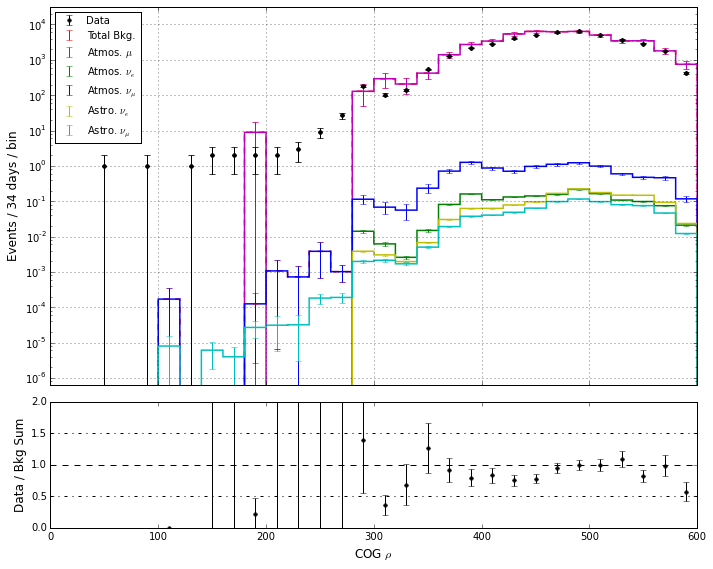

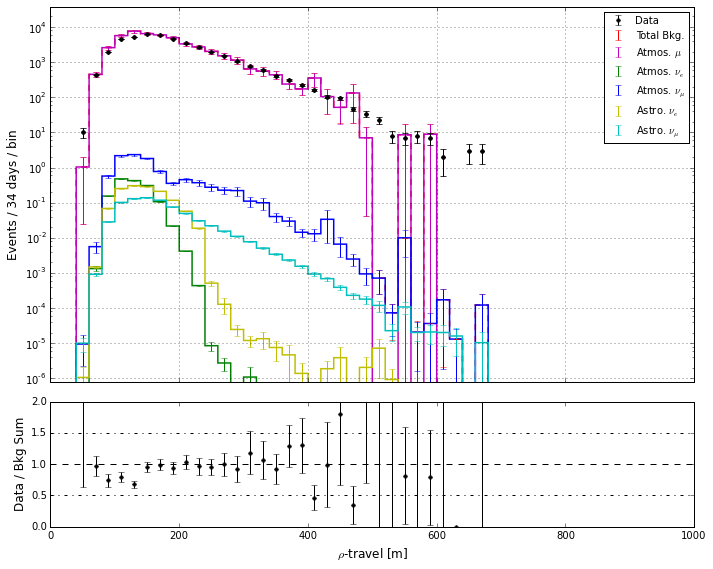

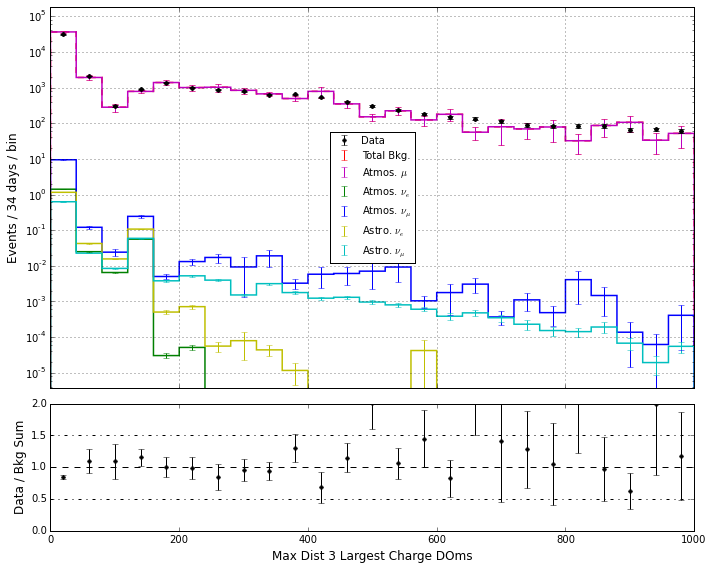

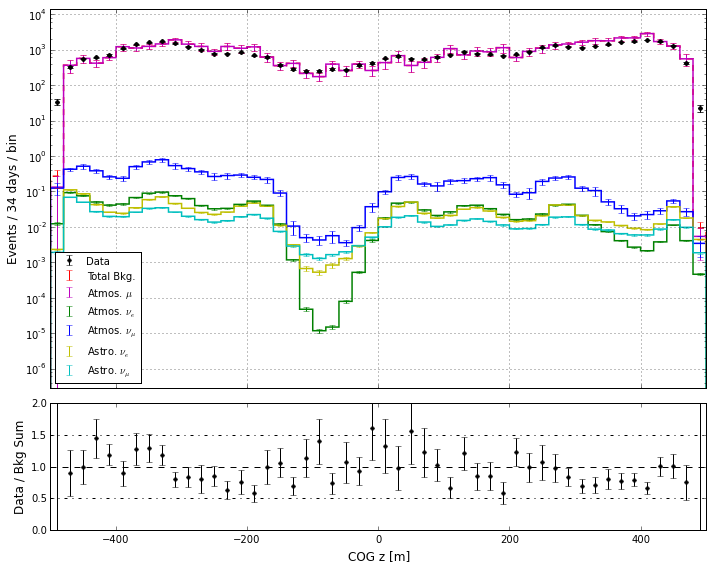

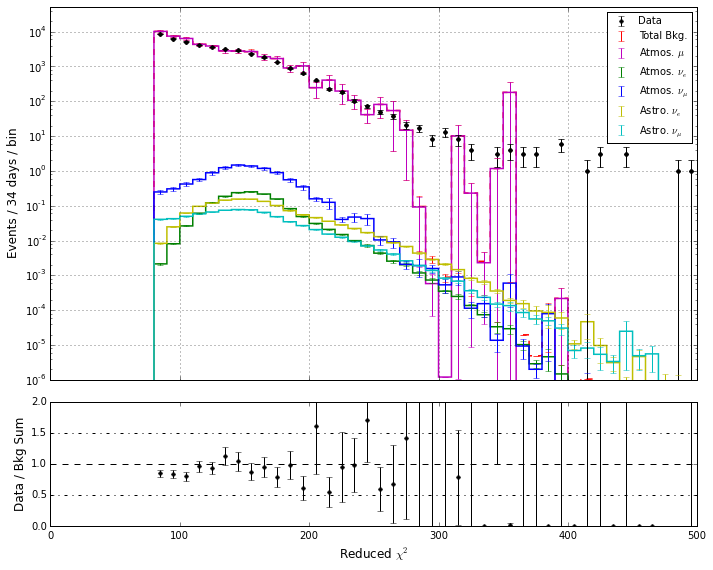

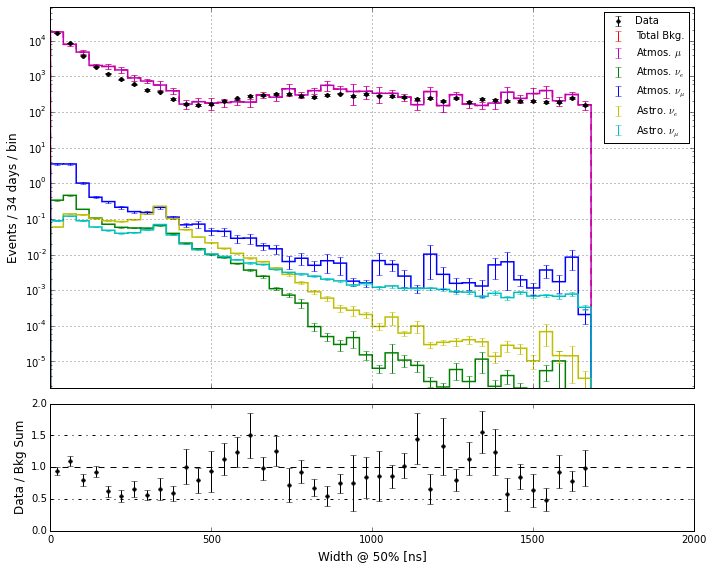

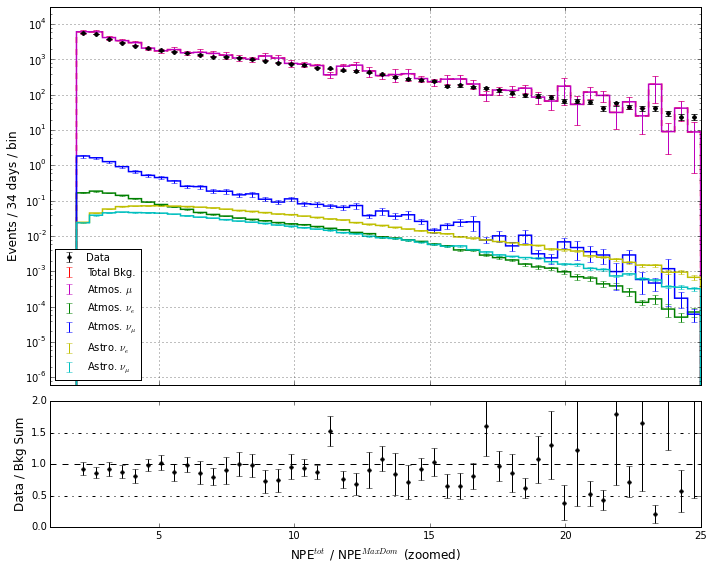

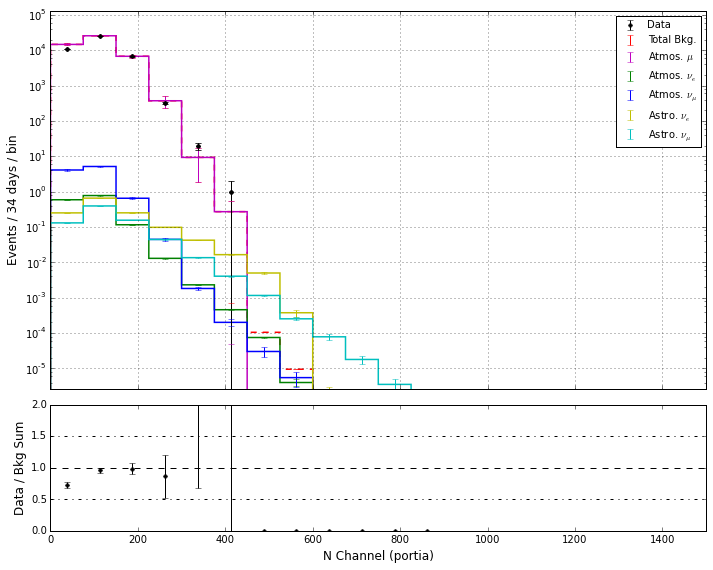

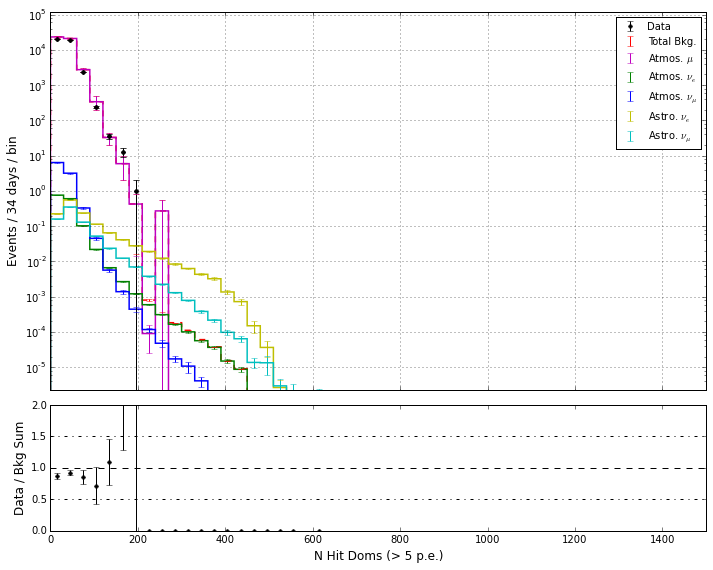

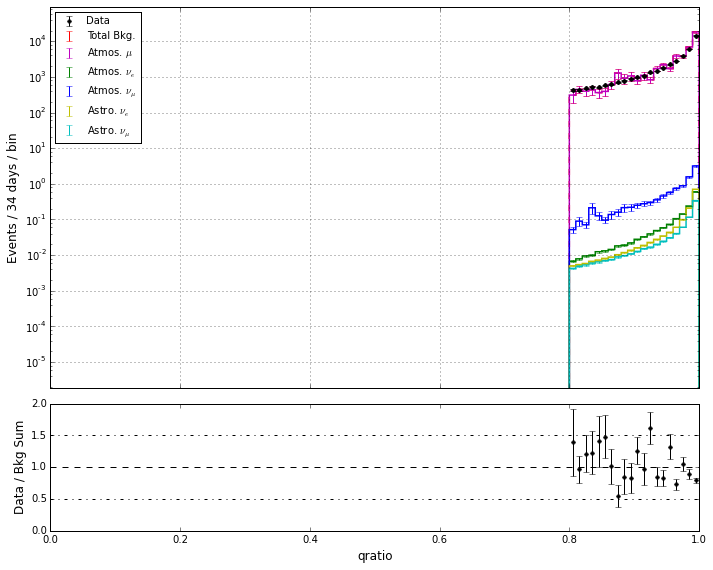

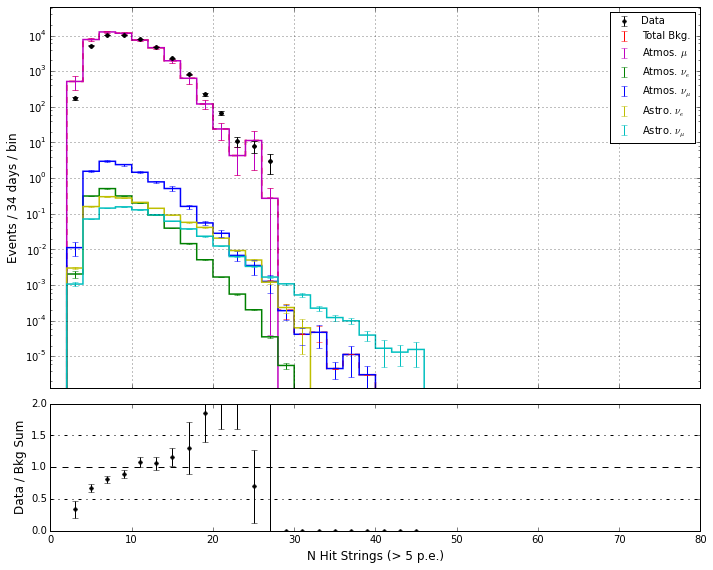

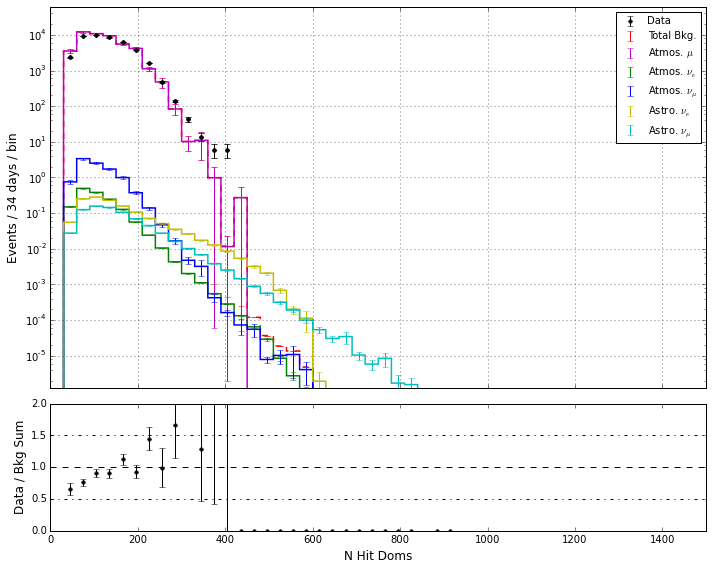

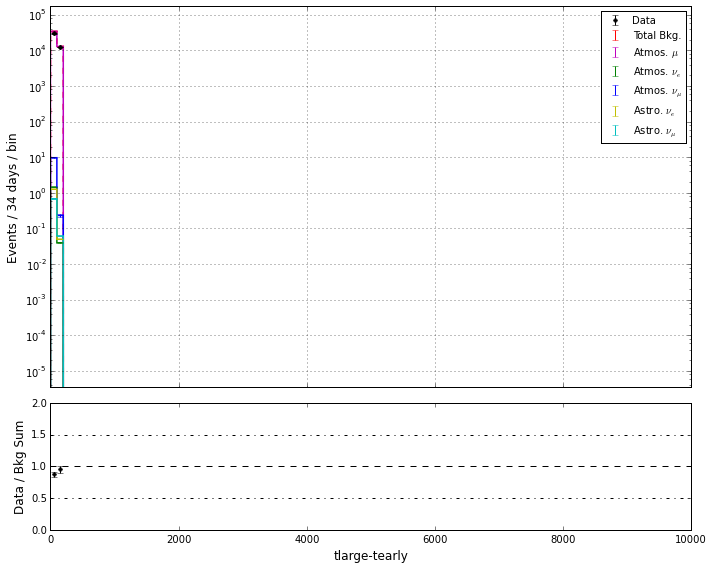

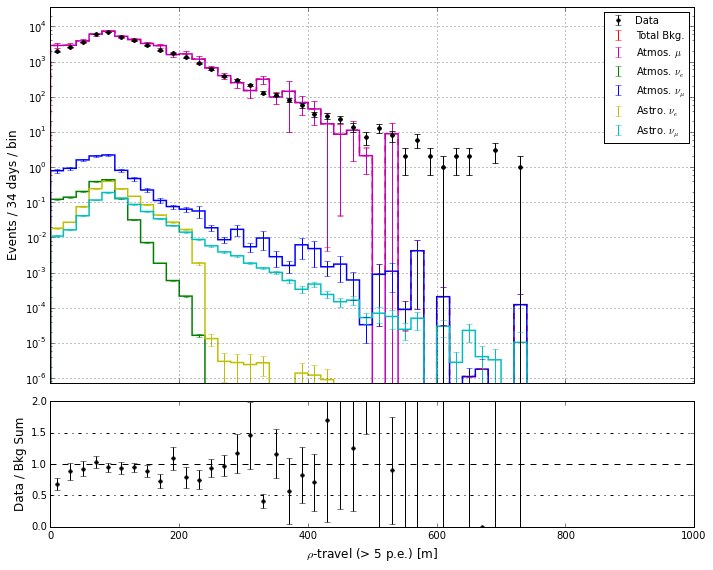

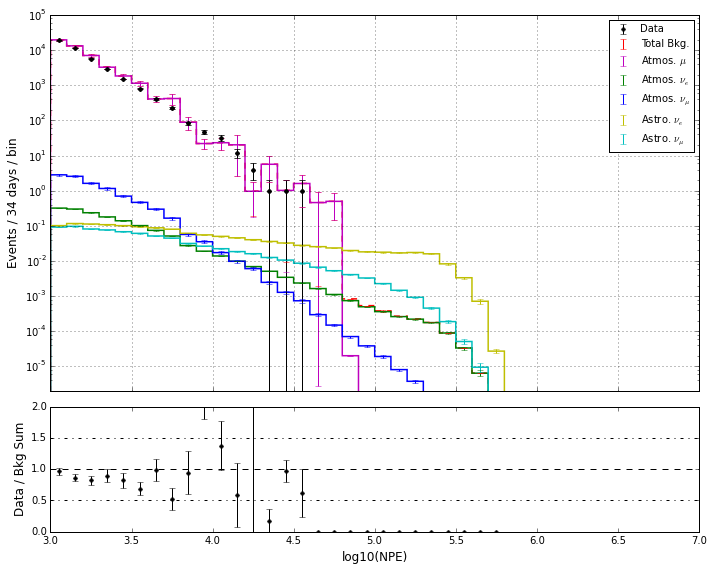

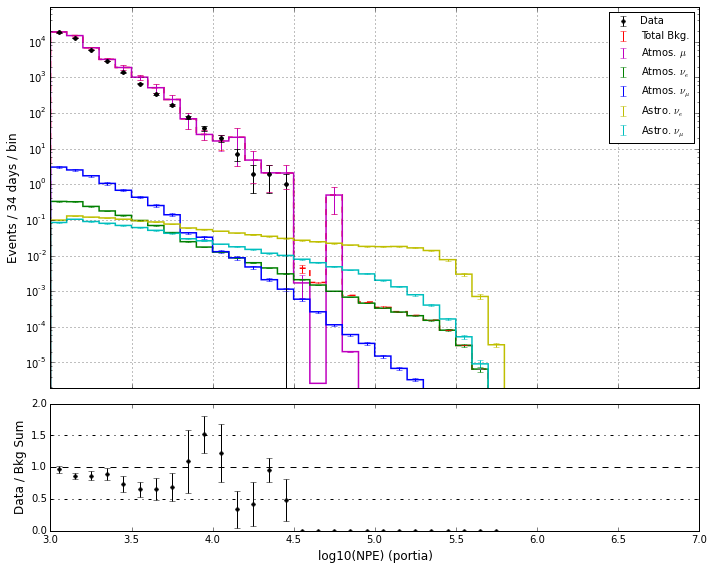

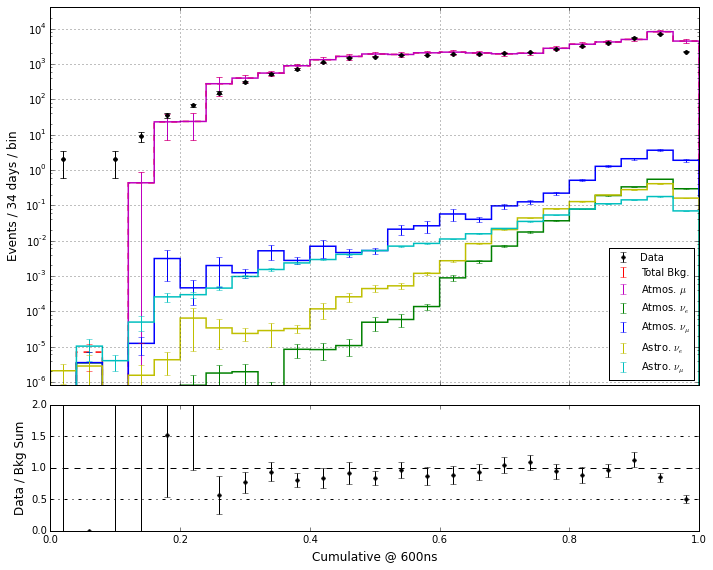

In [19]:
# Remake the plots
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    
    #plt.savefig(savedir+'ballooncut_qratiocut_timing/'+lims[3]+'.png')

In [ ]:
# Data cleaning step 1:
# rho-travel < 400




In [28]:
# Peal some events off for further examination
def peal(var, cut):
    ids = dt_data[ dt_data[var] > cut][['evtid','runid']]
    return ids

def writeIDS(var,cut,fname):
    ids = peal(var,cut)
    outfile = open(fname,'w')
    evts = ids['evtid'].as_matrix()
    runs = ids['runid'].as_matrix()
    for i in range(len(runs)):
        outfile.write(str(runs[i])+ " " + str(evts[i]) + "\n")
    outfile.close()

#peal('hm_nhit_strings', 35)
#writeIDS('hm_nhit_doms',370,'dataskim_nhitdoms40.txt')

In [31]:
print len(dt_data), len(dt_cor), len(dt_nue[dt_nue['PrimaryNeutrinoEnergy']>np.power(10,6)])

75838 10339 345892
